## Rows Represent Transactions or Interactions

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nxviz import CircosPlot

In [2]:
gym=pd.read_csv('./../data/us_womens_gymnastics.csv')
gym.head()

,Name_x,Name_y,Games,Event
0,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Marian Emma Barone (Twining-),1948 Summer,Gymnastics Women's Team All-Around
1,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)","Consetta Anne ""Connie"" Caruccio-Lenz",1948 Summer,Gymnastics Women's Team All-Around
2,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Dorothy Katherine Dalton,1948 Summer,Gymnastics Women's Team All-Around
3,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Meta Elste (Neumann-),1948 Summer,Gymnastics Women's Team All-Around
4,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Helen Mary Schifano (-Sjursen),1948 Summer,Gymnastics Women's Team All-Around


In [3]:
gym_sorted=gym.groupby(['Name_x', 'Name_y']).count().sort_values(by=['Event'], ascending=False)
gym_sorted.head()

,,Games,Event
Name_x,Name_y,,
Muriel Evelyn Davis-Grossfeld,Doris Gudrun Fuchs (-Brause),13,13
Doris Gudrun Fuchs (-Brause),Muriel Evelyn Davis-Grossfeld,13,13
Dominique Margaux Dawes (-Thompson),Kerri Allyson Strug (-Fischer),12,12
Kerri Allyson Strug (-Fischer),Dominique Margaux Dawes (-Thompson),12,12
Linda Joan Metheny (-Mulvihill),"Cathleen Roxanne ""Cathy"" Rigby (-Mason, -McCoy)",12,12


In [4]:
# Doris Gudrun Fuchs (-Brause) and Muriel Evelyn Davis-Grossfeld are the gymnastics 
# that have shared the largest number of events together

In [5]:
G = nx.from_pandas_edgelist(gym, source='Name_x', target='Name_y')

### How many gymnasts (nodes) are in the graph?

In [6]:
G.order()

94

### How many edges are in the graph?

In [7]:
G.size()

292

### What is the average degree?

Each node in a graph has a degree, or the number of nodes you can reach from that node by traversing along the edges of the graph (jumping from one node to other connected nodes)

In [8]:
sum(dict(G.degree()).values())/G.order()

6.212765957446808

The average degree of the graph tells you the average number of nodes that can be reached from a node in the graph and is a measure of how connected your graph is

### What is the density of the graph?

In [9]:
nx.density(G)

0.06680393502630977

The density of the graph tells us the percentage of the graph that can be reached by the average node.

### Is this graph fully-connected? How do you know?

No, it is not. Based on the results on density and average degree we can see that the first is not 100% which would mean totally connected; and the latter is not as large as the number of nodes

### What gymnast has the highest betweenness centrality?

Betweenness centrality tells us which nodes in our network are likely pathways for information

In [10]:
betweenness = nx.betweenness_centrality(G)
pd.DataFrame.from_dict(betweenness, orient='index').sort_values(0, ascending=False).head()

,0
Linda Joan Metheny (-Mulvihill),0.050023
Muriel Evelyn Davis-Grossfeld,0.041842
"Kimberly Ann Chace (-Boyle, -May)",0.026882
"Consetta Anne ""Connie"" Caruccio-Lenz",0.017999
Dominique Margaux Dawes (-Thompson),0.006078


### What gymnast has the highest Eigenvector centrality?

Eigenvector centrality measures related influence or who is closest to the most important nodes in the network

In [11]:
eigenvector = nx.eigenvector_centrality_numpy(G)
pd.DataFrame.from_dict(eigenvector, orient='index').sort_values(0, ascending=False).head()

,0
Clara Marie Schroth-Lomady,0.330626
Dorothy Katherine Dalton,0.330626
Meta Elste (Neumann-),0.330626
Marian Emma Barone (Twining-),0.330626
"Consetta Anne ""Connie"" Caruccio-Lenz",0.317994


###   What gymnast has the highest degree centrality?

Degree centrality is a measure of popularity based on a node's degree

In [12]:
degree = nx.degree_centrality(G)
pd.DataFrame.from_dict(degree, orient='index').sort_values(0, ascending=False).head()

,0
"Consetta Anne ""Connie"" Caruccio-Lenz",0.150538
Muriel Evelyn Davis-Grossfeld,0.150538
Linda Joan Metheny (-Mulvihill),0.150538
Dominique Margaux Dawes (-Thompson),0.139785
Dorothy Katherine Dalton,0.118280


## Rows Represent Entities

In [13]:
basket=pd.read_csv('./../data/us_mens_basketball.csv')
basket.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [14]:
def df_to_graph(df, entity, edge):
    df2 = df.copy()
    graph_df = pd.merge(df, df2, how='inner', on=edge)

    graph_df = graph_df.groupby([entity + '_x', entity + '_y', edge]).count().reset_index()

    graph_df = graph_df[graph_df[entity + '_x'] != graph_df[entity + '_y']]

    if type(edge) == list:
        graph_df = graph_df[[entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df[[entity + '_x', entity + '_y', edge]]
    
    return graph_df

In [15]:
graph_df=df_to_graph(basket, 'Name', 'Games')
graph_df.head()

,Name_x,Name_y,Games
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1976 Summer
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1976 Summer
3,Adrian Delano Dantley,"Michel Taylor ""Tate"" Armstrong",1976 Summer
4,Adrian Delano Dantley,"Mitchell William ""Mitch"" Kupchak",1976 Summer
5,Adrian Delano Dantley,"Philip Jackson ""Phil"" Ford, Jr.",1976 Summer


Now that you have a data frame of pairwise connections, convert it into a graph.

In [17]:
G_b = nx.from_pandas_edgelist(graph_df, source='Name_x', target='Name_y')

### How many basketball players (nodes) are in the graph?

In [18]:
G_b.order()

196

### How many edges are in the graph?

In [19]:
G_b.size()

1232

### What is the average degree?

In [20]:
sum(dict(G_b.degree()).values())/G_b.order()

12.571428571428571

### What is the density of the graph?

In [21]:
nx.density(G_b)

0.06446886446886448

### Is this graph fully-connected? How do you know?

No, it's not. Neither the average degree nor the density show a fully connected values which would be 196 and 1 respectively

### What player has the highest betweenness centrality?

In [22]:
betweenness_b = nx.betweenness_centrality(G_b)
pd.DataFrame.from_dict(betweenness_b, orient='index').sort_values(0, ascending=False).head()

,0
Gary Dwayne Payton,0.091938
Jason Frederick Kidd,0.091356
Carmelo Kyan Anthony,0.047423
David Maurice Robinson,0.032662
"William Marion ""Bill"" Hougland",0.030241


### What player has the highest Eigenvector centrality?

In [23]:
eigenvector_b = nx.eigenvector_centrality_numpy(G_b)
pd.DataFrame.from_dict(eigenvector_b, orient='index').sort_values(0, ascending=False).head()

,0
Carmelo Kyan Anthony,0.341850
LeBron Raymone James,0.288454
Deron Michael Williams,0.224317
Kobe Bean Bryant,0.224317
"Christopher Emmanuel ""Chris"" Paul",0.224317


### What player has the highest degree centrality?

In [24]:
degree_b = nx.degree_centrality(G_b)
pd.DataFrame.from_dict(degree_b, orient='index').sort_values(0, ascending=False).head()

,0
Carmelo Kyan Anthony,0.184615
David Maurice Robinson,0.143590
"Robert Albert ""Bob"" Kurland",0.133333
LeBron Raymone James,0.133333
"William Marion ""Bill"" Hougland",0.123077


### What are some notable differences between this graph and the gymnastics graph you analyzed earlier?

The size and order of the second graph is much larger, as well as the average degree.However, the betweennes, Eigenvector and degree centrality of the highest values is quite similar.

## Visualization of Network Data

/home/albertocastellanos/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


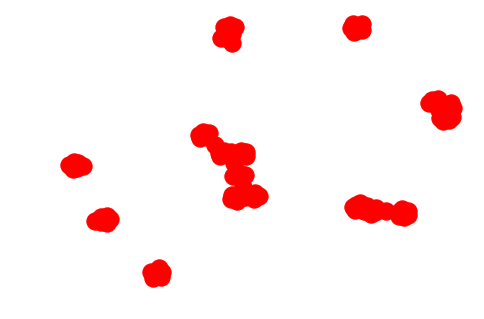

In [25]:
nx.draw(G)

/home/albertocastellanos/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


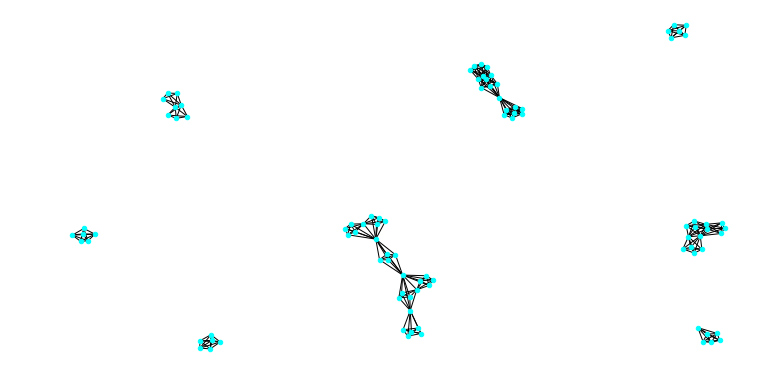

In [26]:
plt.figure(figsize=(10,5))
nx.draw(G, node_size=20, node_color='cyan')

/home/albertocastellanos/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


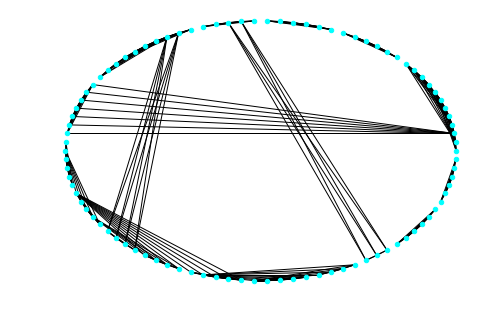

In [27]:
nx.draw_circular(G, node_size=20, node_color='cyan')

/home/albertocastellanos/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


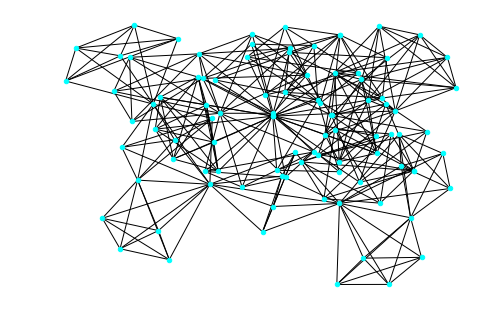

In [28]:
nx.draw_kamada_kawai(G, node_size=20, node_color='cyan')

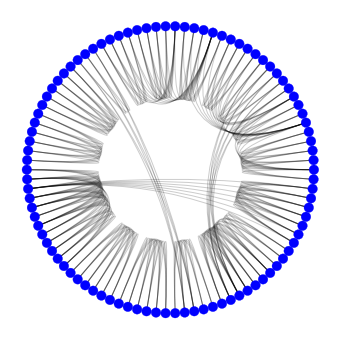

In [29]:
c = CircosPlot(G)
c.draw()

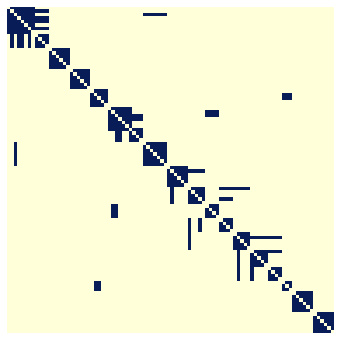

In [30]:
from nxviz import MatrixPlot

m = MatrixPlot(G)
m.draw()

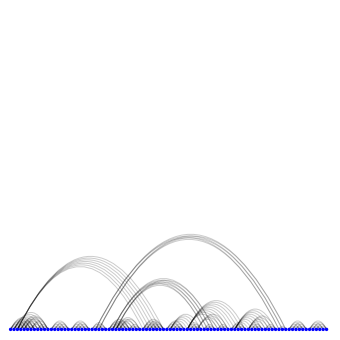

In [31]:
from nxviz import ArcPlot

a = ArcPlot(G)
a.draw()

### Bar Charts: For the basketball data set, ggregate your data by entity, count the number of connections or the total number of interactions, sort them, filter to get just the top 20, and visualize it as a horizontal bar chart

In [32]:
top20=graph_df.groupby('Name_x').agg('count').sort_values(by='Games', ascending=False).head(20)['Games']
top20

Name_x
Carmelo Kyan Anthony                    44
LeBron Raymone James                    33
David Maurice Robinson                  33
Robert Albert "Bob" Kurland             26
William Marion "Bill" Hougland          24
John Houston Stockton                   22
Deron Michael Williams                  22
Gary Dwayne Payton                      22
Scottie Maurice Pippen                  22
Christopher Paul "Chris" Mullin         22
Christopher Emmanuel "Chris" Paul       22
Jason Frederick Kidd                    22
Charles Wade Barkley                    22
Carlos Austin Boozer, Jr.               22
Karl Malone                             22
Kevin Wayne Durant                      22
Patrick Aloysius Ewing                  22
Michael Jeffrey Jordan                  22
Kobe Bean Bryant                        22
Mitchell James "Mitch" Richmond, III    22
Name: Games, dtype: int64

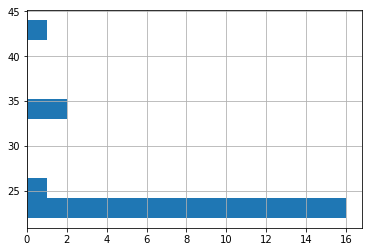

In [33]:
top20.hist(orientation='horizontal')

### Scatter Plots: Generate a scatter plot that shows the relationship that exists between the number of connections and the number of interactions in the gymnastics data set

In [34]:
gym.head()

,Name_x,Name_y,Games,Event
0,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Marian Emma Barone (Twining-),1948 Summer,Gymnastics Women's Team All-Around
1,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)","Consetta Anne ""Connie"" Caruccio-Lenz",1948 Summer,Gymnastics Women's Team All-Around
2,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Dorothy Katherine Dalton,1948 Summer,Gymnastics Women's Team All-Around
3,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Meta Elste (Neumann-),1948 Summer,Gymnastics Women's Team All-Around
4,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Helen Mary Schifano (-Sjursen),1948 Summer,Gymnastics Women's Team All-Around


In [35]:
# I am not sure what is being asked here

## Deeper Analysis of Networks

### Subgraphs

/home/albertocastellanos/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


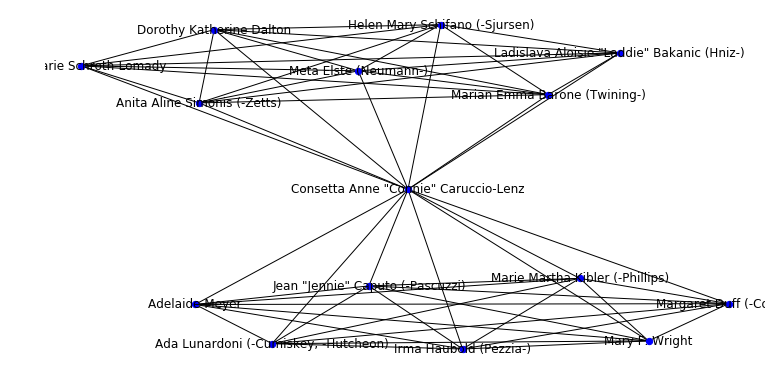

In [36]:
ego = nx.ego_graph(G, 'Consetta Anne "Connie" Caruccio-Lenz', radius=1)
plt.figure(figsize=(10,5))
nx.draw(ego, node_size=40, node_color='blue', with_labels=True)

/home/albertocastellanos/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


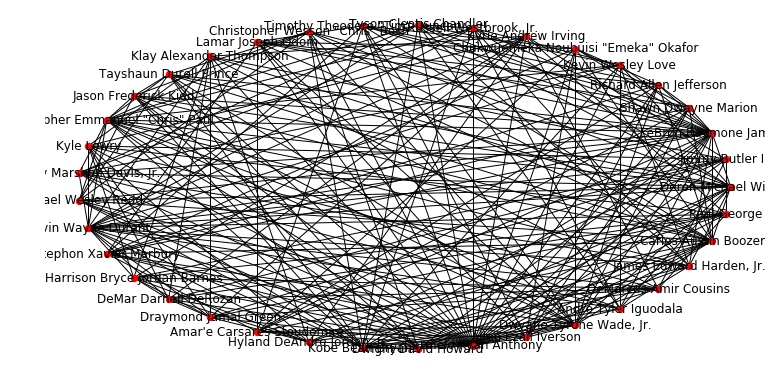

In [37]:
ego2 = nx.ego_graph(G_b, 'Carmelo Kyan Anthony', radius=1)
plt.figure(figsize=(10,5))
nx.draw_circular(ego2, node_size=40, node_color='red', with_labels=True)

### Community Detection

In [38]:
import community

In [39]:
parts=community.best_partition(G)
parts

{'Ladislava Aloisie "Laddie" Bakanic (Hniz-)': 0,
 'Marian Emma Barone (Twining-)': 0,
 'Consetta Anne "Connie" Caruccio-Lenz': 1,
 'Dorothy Katherine Dalton': 0,
 'Meta Elste (Neumann-)': 0,
 'Helen Mary Schifano (-Sjursen)': 0,
 'Clara Marie Schroth-Lomady': 0,
 'Anita Aline Simonis (-Zetts)': 0,
 'Ruth Catherine Grulkowski (-Hatyina)': 0,
 'Marie Margaret Hoesly': 0,
 'Doris Ann Kirkman (-Cannon)': 0,
 'Ruth Elizabeth Topalian (Lehle-)': 0,
 'Mohini Bhardwaj (-Barry)': 2,
 'Annia Portuondo Hatch': 2,
 'Terin Marie Humphrey': 2,
 'Courtney Anne Kupets (-Carter)': 2,
 'Courtney Lynn McCool': 2,
 'Carly Rae Patterson (-Caldwell)': 2,
 'Pamela Jean "Pam" Bileck (-Flat)': 3,
 'Michelle Hollis Dusserre (-Farrell)': 3,
 'Kathleen Ann "Kathy" Johnson (-Clarke)': 3,
 'Julianne Lyn McNamara (-Zeile)': 3,
 'Mary Lou Retton (-Kelley)': 3,
 'Tracee Ann Talavera (-Kent)': 3,
 'Simone Arianne Biles': 4,
 'Gabrielle Christina Victoria "Gabby" Douglas': 4,
 'Alexandra Rose "Aly" Raisman': 4,
 'Laure

/home/albertocastellanos/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


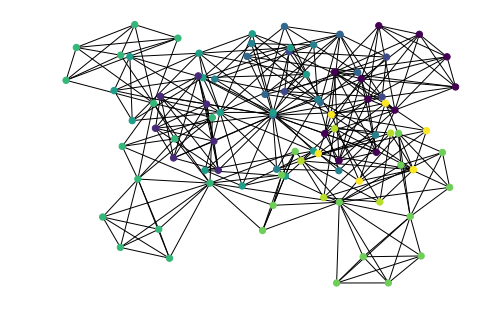

In [40]:
values = list(parts.values())
nx.draw_kamada_kawai(G, node_size=40, node_color=values)

### Hierarchical Graphs: Strip out the athletes as entities, and analyze the data at the Games level. To do this, we would need to designate the Games field as the entities and then use the athlete names as the edge criteria so that there would be an edge between two Olympic games if an athlete played in both of them.

In [41]:
graph_h=df_to_graph(basket, 'Games', 'Name')
graph_h.head()

,Games_x,Games_y,Name
28,1948 Summer,1952 Summer,"Robert Albert ""Bob"" Kurland"
29,1952 Summer,1948 Summer,"Robert Albert ""Bob"" Kurland"
44,1952 Summer,1956 Summer,"William Marion ""Bill"" Hougland"
45,1956 Summer,1952 Summer,"William Marion ""Bill"" Hougland"
58,1956 Summer,1960 Summer,"Burdette Eliele ""Burdie"" Haldorson"


In [42]:
G_b_h = nx.from_pandas_edgelist(graph_h, source='Games_x', target='Games_y')

/home/albertocastellanos/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


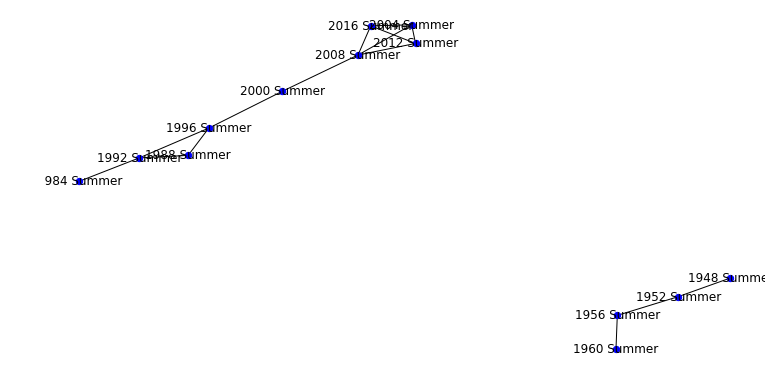

In [43]:
plt.figure(figsize=(10,5))
nx.draw(G_b_h, node_size=40, node_color='blue',with_labels=True )

### Are there any years connected that you weren't expecting?

Connections are quite sensible in general..

### Are there any years you were expecting to be connected that are not?

I am surprised by the few number of connections between games with a gap of more than 4 years. The maximum gap is 8 years, meaning tha not athlete has participated in more than 3 events

### Dig into the underlying data and see if you can find out which players are driving the connection between years.

In [49]:
graph_h.groupby(['Name','Games_x']).agg('count').sort_values(by='Games_y', ascending=False)

Games_y
Name                                 Games_x             
Carmelo Kyan Anthony                 2004 Summer        3
                                     2008 Summer        3
                                     2012 Summer        3
                                     2016 Summer        3
David Maurice Robinson               1996 Summer        2
                                     1992 Summer        2
                                     1988 Summer        2
LeBron Raymone James                 2004 Summer        2
                                     2008 Summer        2
                                     2012 Summer        2
Michael Jeffrey Jordan               1984 Summer        1
                                     1992 Summer        1
Burdette Eliele "Burdie" Haldorson   1956 Summer        1
Mitchell James "Mitch" Richmond, III 1988 Summer        1
Kobe Bean Bryant                     2008 Summer        1
Kevin Wayne Durant                   2016 Summer        1
Kobe Bean Bryant                     2012 Summer        1
Mitchell James "Mitch" Richmond, III 1996 Summer        1
Karl Malone                          1996 Summer        1
Patrick Aloysius Ewing               1984 Summer        1
                                     1992 Summer        1
Robert Albert "Bob" Kurland          1948 Summer        1
                                     1952 Summer        1
Scottie Maurice Pippen               1992 Summer        1
                                     1996 Summer        1
William Marion "Bill" Hougland       1952 Summer        1
Kevin Wayne Durant                   2012 Summer        1
Jason Frederick Kidd                 2008 Summer        1
Karl Malone                          1992 Summer        1
John Houston Stockton                1996 Summer        1
Carlos Austin Boozer, Jr.            2004 Summer        1
                                     2008 Summer        1
Charles Wade Barkley                 1992 Summer        1
                                     1996 Summer        1
Christopher Emmanuel "Chris" Paul    2008 Summer        1
                                     2012 Summer        1
Christopher Paul "Chris" Mullin      1984 Summer        1
                                     1992 Summer        1
Deron Michael Williams               2008 Summer        1
                                     2012 Summer        1
Dwyane Tyrone Wade, Jr.              2004 Summer        1
                                     2008 Summer        1
Gary Dwayne Payton                   1996 Summer        1
                                     2000 Summer        1
Jason Frederick Kidd                 2000 Summer        1
Burdette Eliele "Burdie" Haldorson   1960 Summer        1
John Houston Stockton                1992 Summer        1
William Marion "Bill" Hougland       1956 Summer        1

## Bonus: More Complex Networks

In [51]:
basketGP=basket[['Games', 'Name']]
basketGP.head()

,Games,Name
0,2000 Summer,Julius Shareef Abdur-Rahim
1,1984 Summer,"Stephen Todd ""Steve"" Alford"
2,2000 Summer,Walter Ray Allen
3,1988 Summer,"William Lloyd ""Willie"" Anderson, Jr."
4,2004 Summer,Carmelo Kyan Anthony


In [53]:
H = nx.from_pandas_edgelist(basketGP, source='Games', target='Name')

In [54]:
F = nx.compose(G_b,H)

/home/albertocastellanos/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


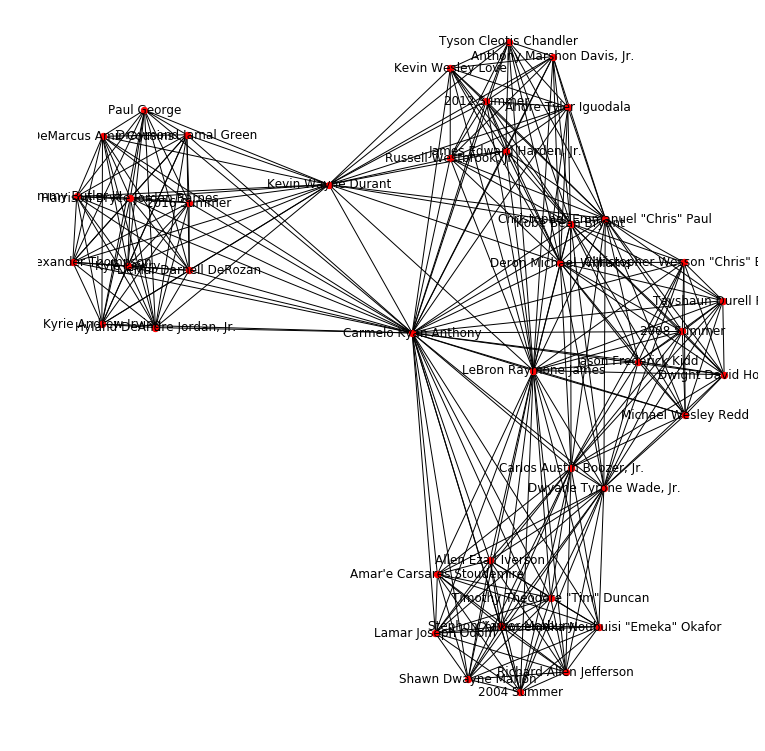

In [59]:
ego3 = nx.ego_graph(F, 'Carmelo Kyan Anthony', radius=1)
plt.figure(figsize=(10,10))
nx.draw(ego3, node_size=40, node_color='red', with_labels=True)

In [64]:
betweenness_H = nx.betweenness_centrality(H)
pd.DataFrame.from_dict(betweenness_H, orient='index').sort_values(0, ascending=False).head()

,0
2000 Summer,0.115023
1996 Summer,0.104475
2008 Summer,0.102729
Gary Dwayne Payton,0.094428
Jason Frederick Kidd,0.093897


In [65]:
eigenvector_H = nx.eigenvector_centrality_numpy(H)
pd.DataFrame.from_dict(eigenvector_H, orient='index').sort_values(0, ascending=False).head()

,0
2008 Summer,0.436839
2012 Summer,0.396364
2004 Summer,0.334546
Carmelo Kyan Anthony,0.302702
LeBron Raymone James,0.260045


In [66]:
degree_H = nx.degree_centrality(H)
pd.DataFrame.from_dict(degree_H, orient='index').sort_values(0, ascending=False).head()

,0
1936 Summer,0.065728
1948 Summer,0.065728
1952 Summer,0.065728
2000 Summer,0.056338
2016 Summer,0.056338
